In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

def makeJKRegionLabels(cat,random_cat,n_jackknife=15):
    data = zip(cat['RA'],cat['DEC'])
    randoms = zip(random_cat['RA'],random_cat['DEC'])
    
    finder = KMeans(n_clusters=n_jackknife)
    data_indices = finder.fit_predict(data)
    
    nbrs = KNeighborsRegressor(n_neighbors=1)
    nbrs.fit(data,data_indices)
    random_indices = nbrs.predict(randoms)
    
    return data_indices, random_indices

def plotRegion(cat, indices, i):
    locs = np.where(indices == i)
    these_pts = cat[locs]
    plt.scatter(these_pts['RA'],these_pts['DEC'],color=np.random.rand(3,1),linewidths=0)
    
def plotFootprint(cat,indices):
    for i in np.unique(indices):
        plotRegion(cat, indices, i)

In [3]:
data = fits.getdata('/nfs/slac/g/ki/ki19/des/mbaumer/3pt_data/jackknife_randoms5x/redmagic_data.fits')
randoms = fits.getdata('/nfs/slac/g/ki/ki19/des/mbaumer/3pt_data/jackknife_randoms5x/redmagic_randoms_0.fits')

##Plot previous regions

In [15]:
data = data[data['DEC'] < -35]
data['RA'] = data['RA']-(360*(data['RA'] > 180))

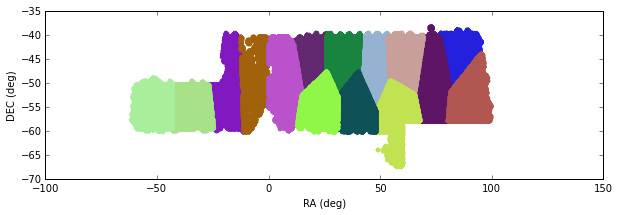

In [19]:
inds = np.load('/nfs/slac/g/ki/ki19/des/mbaumer/3pt_data/jackknife_randoms5x/redmagic_data_jk_inds.npy')
plt.figure(figsize=(10,3))
plotFootprint(data,inds)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


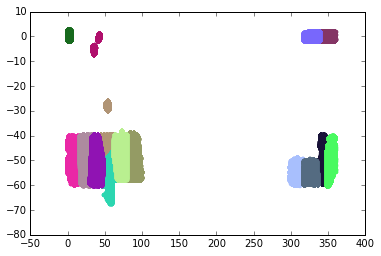

In [3]:
ind1, ind2 = makeJKRegionLabels(data,randoms)
plotFootprint(data,ind1)

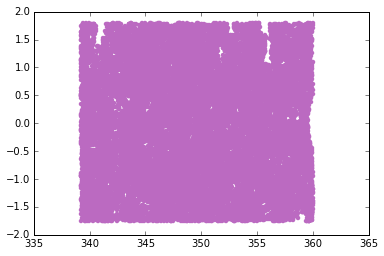

In [4]:
plotRegion(data,ind1,3)

##The making of...

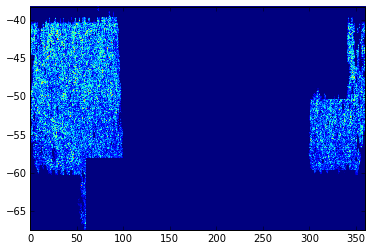

In [5]:
cat = data;
footprint = (cat['DEC'] < -35)
spt = cat[footprint]
plt.hist2d(spt['RA'],spt['DEC'],bins=(500,500));

In [6]:
data = zip(spt['RA'],spt['DEC'])
random_cat = randoms[randoms['DEC'] < -35]
randoms = zip(random_cat['RA'],random_cat['DEC'])

In [7]:
from sklearn.cluster import KMeans
n_jackknife = 15
finder = KMeans(n_clusters=n_jackknife)
indices = finder.fit_predict(data)

##Using data

In [8]:
def plotRegion(i):
    locs = np.where(indices == i)
    these_pts = spt[locs]
    plt.scatter(these_pts['RA'],these_pts['DEC'],color=np.random.rand(3,1),linewidths=0)

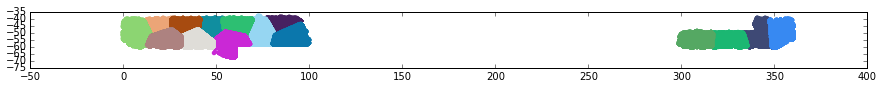

In [9]:
plt.figure(figsize=(15,1))
for i in range(n_jackknife):
    plotRegion(i)

##Plot one jackknife region

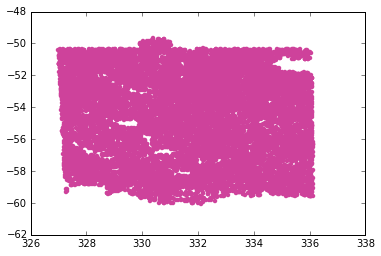

In [8]:
plotRegion(1)

##Using randoms

In [10]:
from sklearn.neighbors import KNeighborsRegressor
nbrs = KNeighborsRegressor(n_neighbors=1)
nbrs.fit(data,indices)
random_indices = nbrs.predict(randoms)

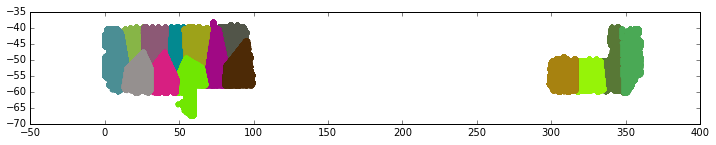

In [11]:
plt.figure(figsize=(12,2))
for i in range(n_jackknife):
    locs = np.where(random_indices == i)
    these_pts = random_cat[locs]
    plt.scatter(these_pts['RA'],these_pts['DEC'],color=np.random.rand(3,1),linewidths=0)

In [24]:
len(indices)

570993

In [14]:
len(randoms)

2902084

In [23]:
np.save('random_0_jk_inds.npy',random_indices)

In [ ]:
np.save('data_jk_inds.npy',indices)